In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

/var/folders/1m/7n3mw1wj3ml7gf8rmsjswdrr0000gn/T/ipykernel_55966/4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [5]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [6]:
# Save references to each table
Measurement = Base.classes.measurement  # Reference to the 'measurement' table
Station = Base.classes.station  

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [8]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
# Print the most recent date
print(most_recent_date)


('2017-08-23',)


Text(0, 0.5, 'Inches')


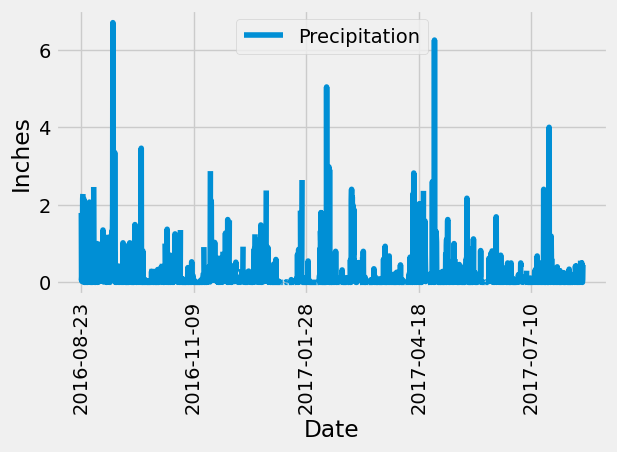

In [9]:
import pandas as pd
import datetime as dt

# #from datetime import datetime, timedelta
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Calculate the date one year from the most recent date in the dataset
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x='Date', y='Precipitation', rot =90)
plt.xlabel('Date')   #lables the x-axis
plt.ylabel('Inches')   #labels the y- axis
# Print the ylabel object to get "Text(0, 0.5, 'Inches')"
ylabel = plt.ylabel('Inches')
print(ylabel)

plt.tight_layout()
plt.show()

In [10]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = precipitation_df['Precipitation'].describe()

# Convert the summary statistics to a DataFrame
summary_stats_df = pd.DataFrame(summary_stats)

# Print the summary statistics DataFrame
summary_stats_df

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [11]:
# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station.distinct())).all()
    # Print the total number of stations
total_stations

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# List the stations and their counts in descending order
most_active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
from numpy import append

most_active_station_id = most_active_stations[0][0]  # Get the station ID of the most active station

# Query to calculate the lowest, highest, and average temperature for the most active station
temperatureStats = session.query(
    func.min(Measurement.tobs),  # Calculate the lowest temperature
    func.max(Measurement.tobs),  # Calculate the highest temperature
    func.avg(Measurement.tobs)   # Calculate the average temperature
).filter(
    Measurement.station == most_active_station_id  # Filter by the most active station
).one()  # Fetch the result as a tuple

# Wrap the result in a list to match the desired format
temperatureList = [temperatureStats]

# Print the results
print(temperatureList)

[(54.0, 85.0, 71.66378066378067)]


Text(0.5, 4.183333333333314, 'Temperature')


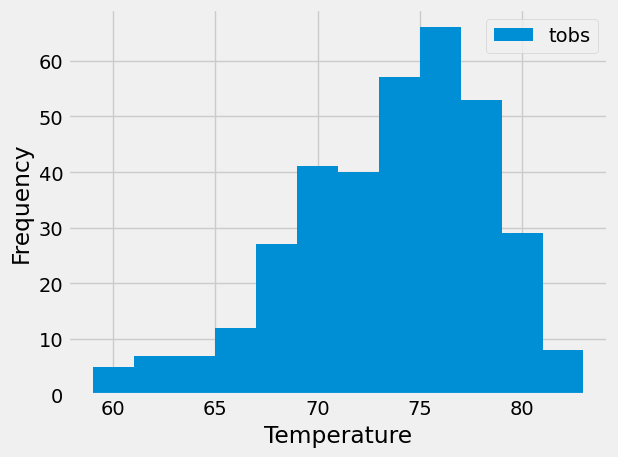

In [15]:
import matplotlib.pyplot as plt
import datetime as dt

# Using the most active station id
# Calculate the date one year ago from the most recent date in the dataset
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Query the last 12 months of temperature observation data for this station
temperature_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station_id).\
    filter(Measurement.date >= one_year_ago).all()

# Convert the query result to a list of temperatures
temperatures = [temp[0] for temp in temperature_data]

#Plot the results as a histogram
plt.figure()
plt.hist(temperatures, label="tobs",  bins=12)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
xlabel = plt.xlabel('Temperature')
xlabel.set_position((0.5, 4.183333333333314)) 
print(xlabel)
plt.tight_layout()
plt.legend()
plt.show()

# Close Session

In [16]:
# Close Session
session.close()